In [1]:
!pip install pandas matplotlib ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 6.1 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from ipywidgets import interact

In [3]:
# Load data from CSV
data_file = 'run_data.csv'  # Make sure your .csv file is uploaded to the Binder environment
df = pd.read_csv(data_file)

# Convert 'Date' to datetime for proper plotting
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y', errors='coerce')

# Check if there are any invalid date values after conversion
if df['Date'].isnull().any():
    print("Warning: Some dates could not be parsed correctly.")

# Preprocess 'Avg Pace (min/km)' column to match hh:mm:ss format
if 'Avg Pace (min/km)' in df.columns:
    df['Avg Pace (min/km)'] = (
        df['Avg Pace (min/km)']
        .str.replace("'", ":", regex=False)
        .str.replace('"', '', regex=False)
    )
    df['Avg Pace (min/km)'] = df['Avg Pace (min/km)'].apply(lambda x: f"00:{x}" if x.count(':') == 1 else x)
    df['Avg Pace (timedelta)'] = pd.to_timedelta(df['Avg Pace (min/km)'])

# Set a consistent date format for the x-axis
date_format = mdates.DateFormatter('%d-%m-%Y')

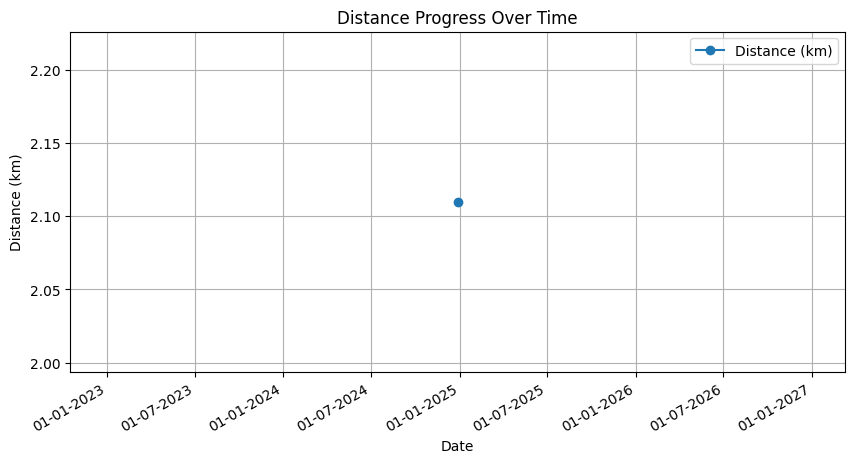

In [4]:
# Plot distance over time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Distance (km)'], marker='o', label='Distance (km)')
plt.title('Distance Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Distance (km)')
plt.gca().xaxis.set_major_formatter(date_format)  # Apply date format to x-axis
plt.gcf().autofmt_xdate()  # Rotate date labels for readability
plt.grid(True)
plt.legend()

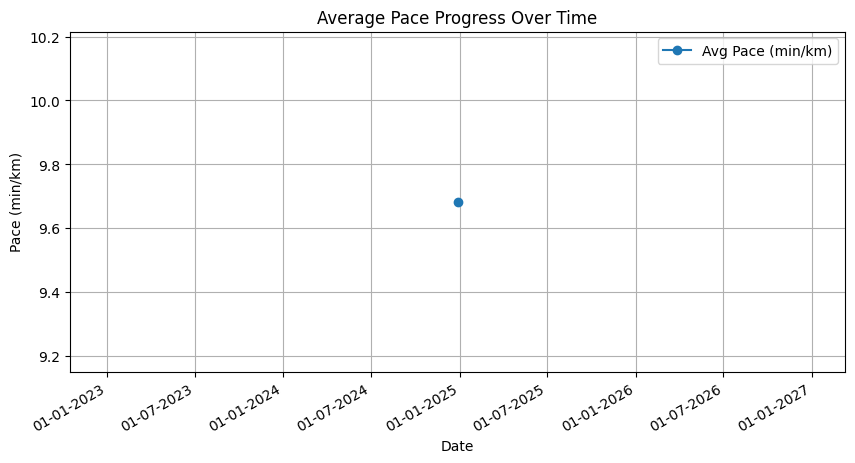

In [5]:
# Plot average pace over time
if 'Avg Pace (timedelta)' in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Avg Pace (timedelta)'].dt.total_seconds() / 60, marker='o', label='Avg Pace (min/km)')
    plt.title('Average Pace Progress Over Time')
    plt.xlabel('Date')
    plt.ylabel('Pace (min/km)')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    plt.grid(True)
    plt.legend()

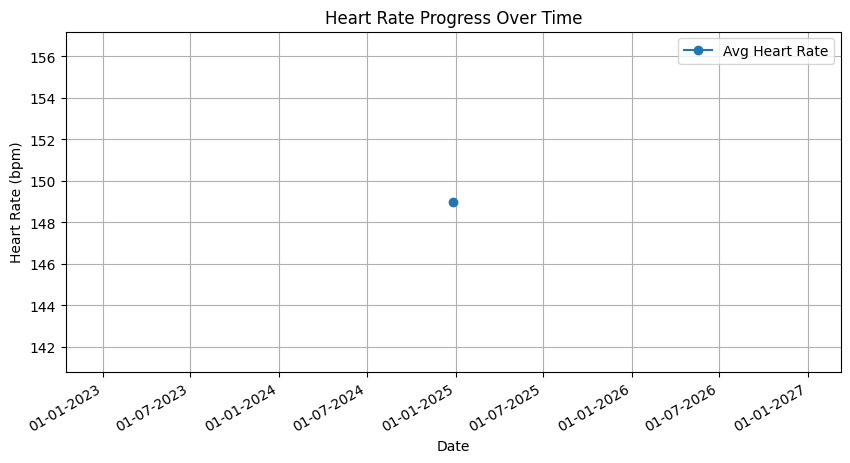

In [6]:
# Plot average heart rate over time
if 'Avg Heart Rate (bpm)' in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Avg Heart Rate (bpm)'], marker='o', label='Avg Heart Rate')
    plt.title('Heart Rate Progress Over Time')
    plt.xlabel('Date')
    plt.ylabel('Heart Rate (bpm)')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    plt.grid(True)
    plt.legend()

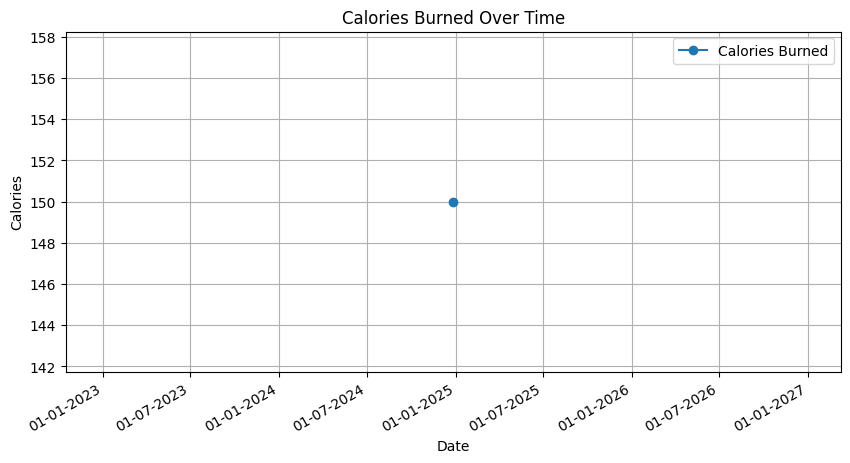

In [7]:
# Plot calories burned over time (assuming the column 'Calories Burned' exists in your dataset)
if 'Calories Burned' in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Calories Burned'], marker='o', label='Calories Burned')
    plt.title('Calories Burned Over Time')
    plt.xlabel('Date')
    plt.ylabel('Calories')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    plt.grid(True)
    plt.legend()

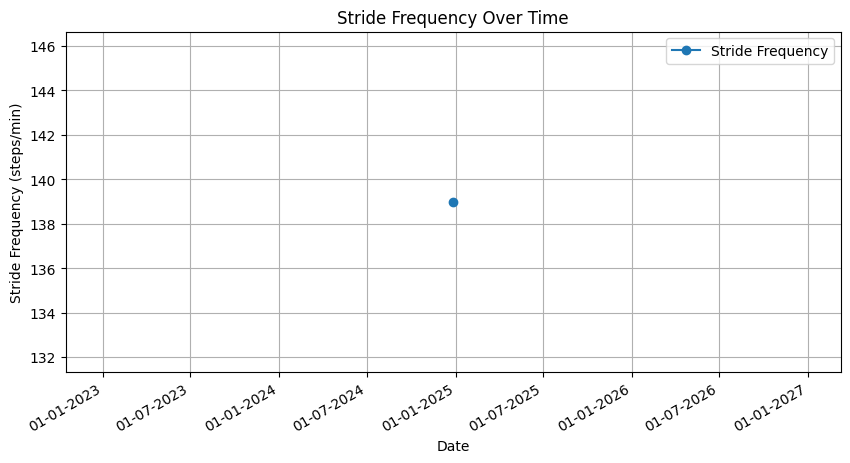

In [8]:
# Plot stride frequency over time (assuming the column 'Avg Stride Frequency (spm)' exists in your dataset)
if 'Avg Stride Frequency (spm)' in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Avg Stride Frequency (spm)'], marker='o', label='Stride Frequency')
    plt.title('Stride Frequency Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stride Frequency (steps/min)')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    plt.grid(True)
    plt.legend()

In [9]:
# Display all figures
plt.show()